## Autocorrelation

< Definition >

Mathematical representation of the degree of similarity between a given time (t) and lagged version of itself (t-k) over successive time interval.

< Equation > 

For a time series dataset, the auto correlation of lag k : p(k), is determine by comparing the values of the variable at time (t) with value at time (t-k) 

Autocorrelation is essentially the correlation within itself, with time (t) to be independent variable

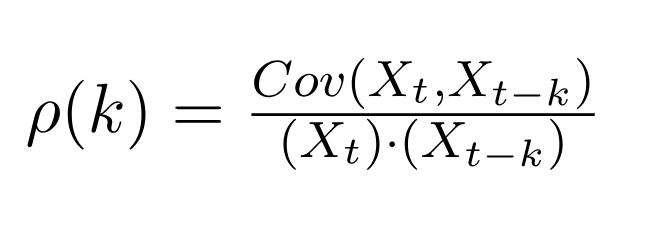|

< Interpretation of Autocorrelation >

- Positive Autocorrelation: Tendency for value at one time to be positively correlated with value at a subsequent time point
- Negative Autocorrelation: Tendency for value at one time to be different at different time interval

#### Airline data

In [2]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# statsmodels seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

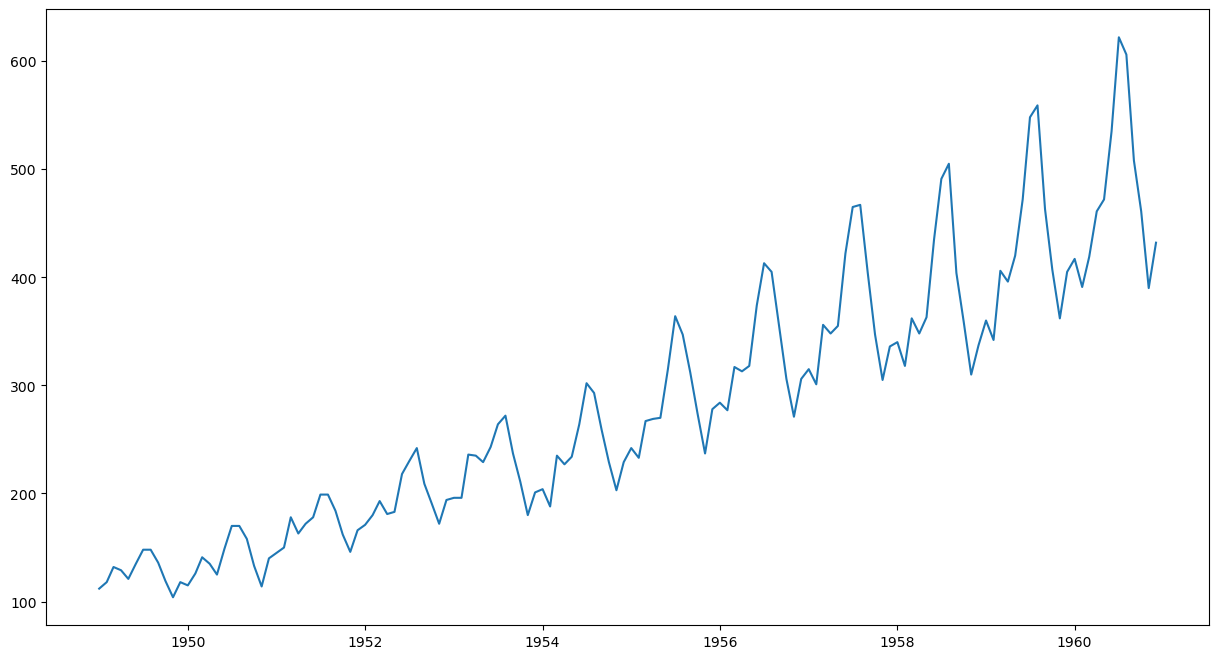

In [3]:
# import Airline datasets

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url,index_col=0, header = 0, parse_dates=['Month'])

# plot the Airline dataset grapgh
plt.figure(figsize = (15,8))
plt.plot(df)

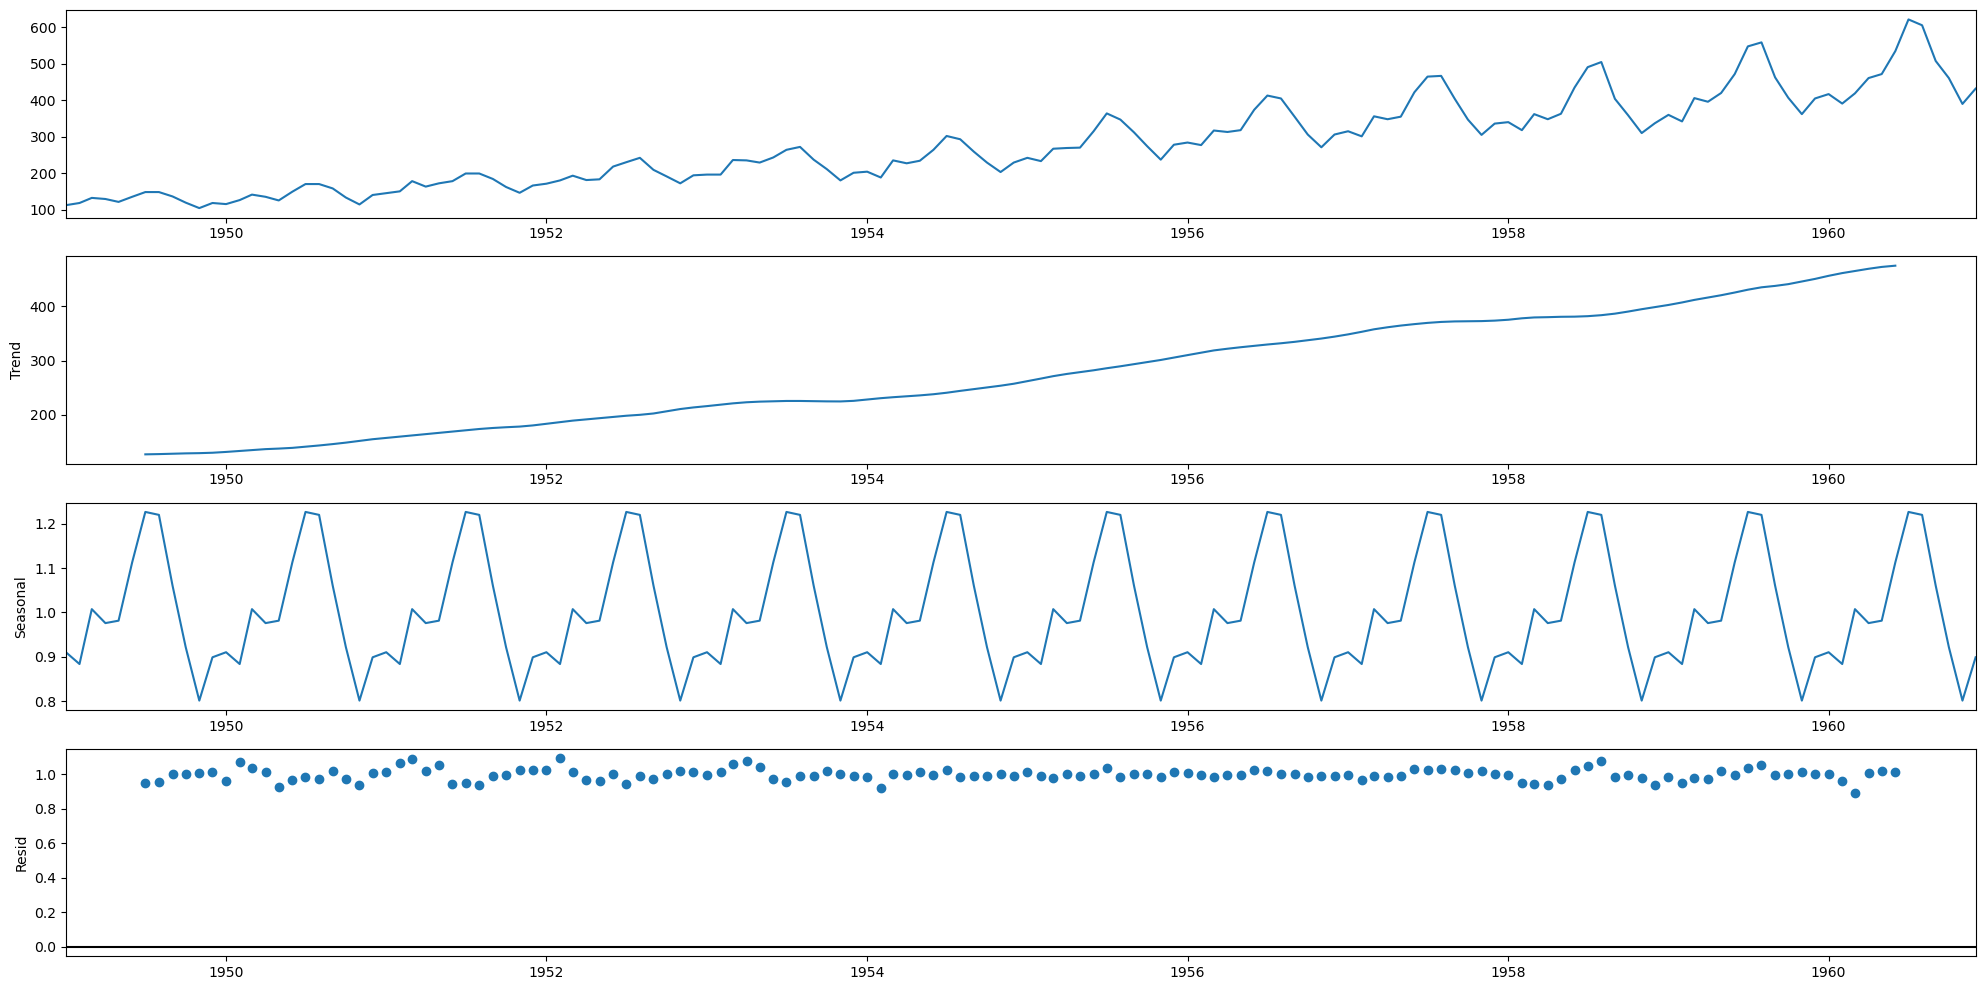

In [4]:
# plot the decomposition

plt.rc("figure", figsize=(20,10))
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

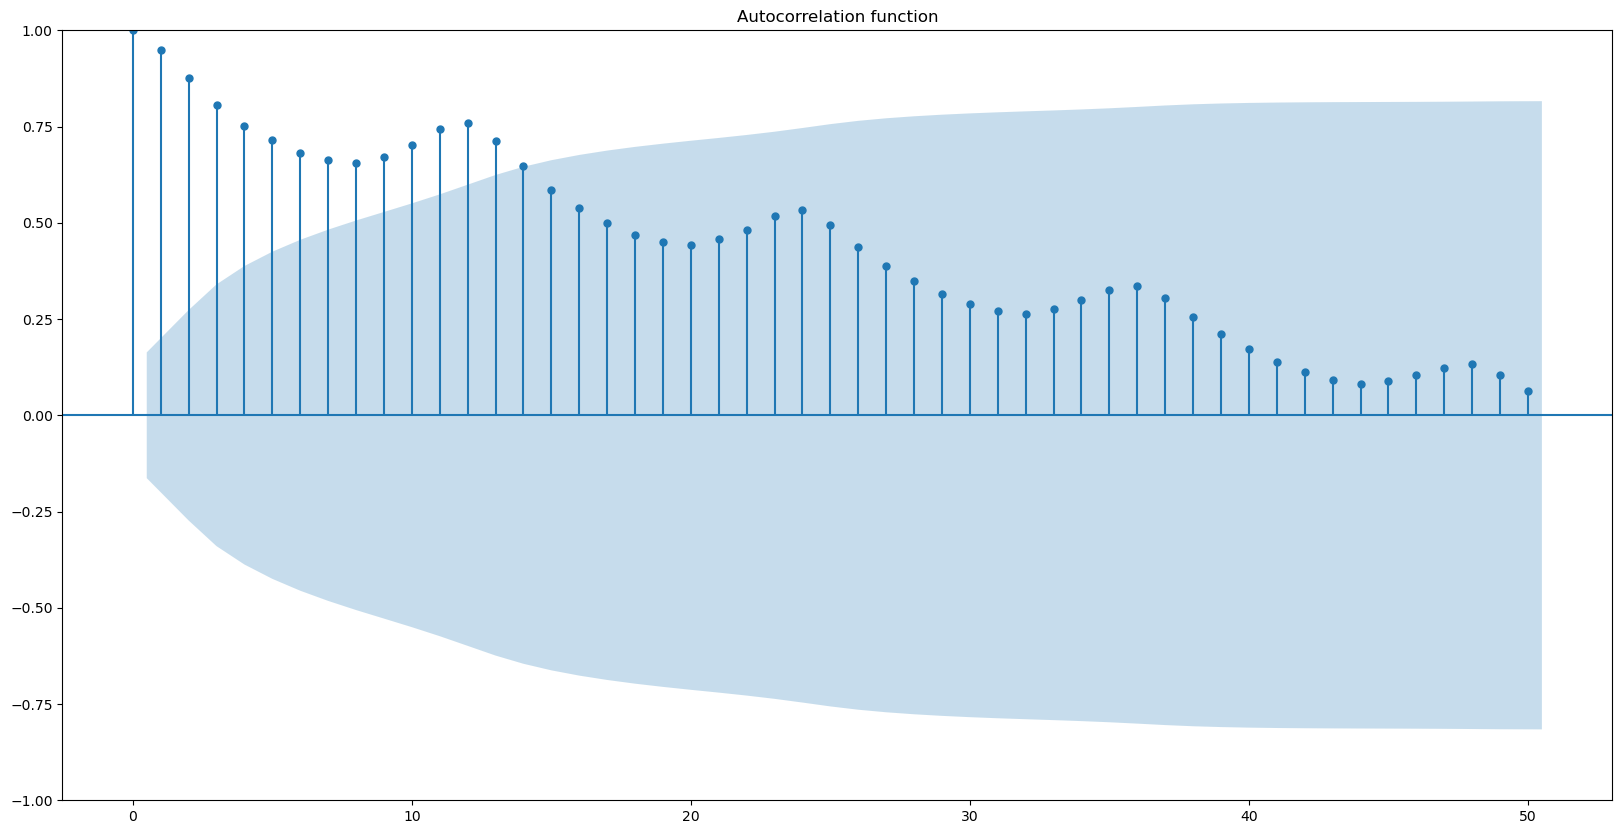

In [5]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df, lags = 50, title='Autocorrelation function')
plt.show()
#data: your time series
#lags: number of 'periods' you will like to investigate 

#### Observations:

Overview: 

- What you can see here are bars and a horizontal cone. This cone pictures the confidence level (by default set to 95%). In other words, if the point is outside the cone (on white) you may say that with 95% probability is has a certain impact on values. If the bar is inside the cone (on blue) you may ignore this particular lag as most likely it is not relevant.


Particular bars:
- The first point (with index 0) has a height 1. In fact the first one is alwys 1. It make sense as current value always explain fully current value.
- The second point is around 0.9 which means that following point (directly next one) is described in 90% by the previous value.
- Eleventh bar has a height of 0.75. This means that current data will impact data in 11 month by 75% (data resolution is monthly).

Seasonal observations:

What else can we observe here? There is a significant increase in 12th index bar (13th bar as it starts at zero). This suggest a cycle of length 12. It is not a surprise as the data has a monthly granularity. 

There is a similar peak on 24th index (25th bar) due to very same reason however this bar is “on blue” therefore data are not relevant enough to carry any meaningful information.

## Partial Autocorrelation

#### Auto-Correlation Function (ACF) : 

- Auto-correlation of lag k is the correlation between Y(t) and Y(t-k), measured at different k lags. 

For lag 1, Auto correlation is measured between Y(t) and Y(t-1), similarly for lag 2, Auto correlation is measured between Y(t) and Y(t-2) values. A plot of auto-correlation for different values of k is called an auto-correlation plot or correlogram.

#### Partial Auto-Correlation (PACF) : 

- Partial Auto Correlation of lag k is the correlation between Y(t) and Y(t-k) when the effect of all other intermediate values (Y(t-1), Y(t-2),….Y(t-k+1)) is removed from both Y(t) and Y(t-k). 

For e.g. , partial auto correlation between y(t) and y(t+1) is the same as their autocorrelation cause there are no intermediate terms between them. Partial autocorrelation between y(t) and y(t+2) will remove the effect of y(t+1) from both y(t) and y(t+2). A plot of partial auto correlation for different values of k is called partial auto correlation plot .

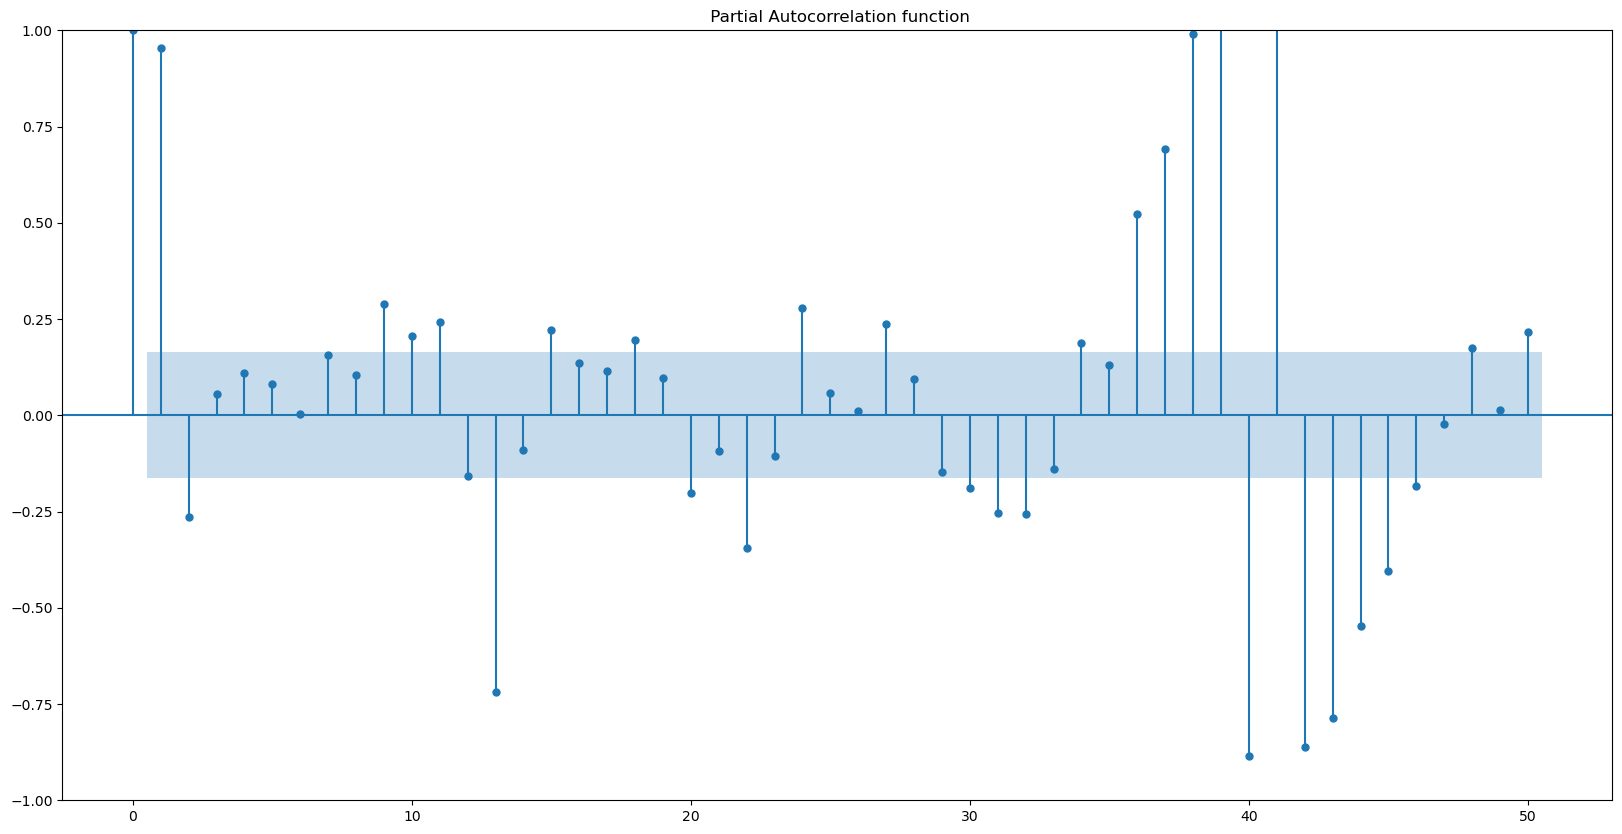

In [6]:
# statsmodels Time series Analysis plot: Partial Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_pacf

plt.rc("figure", figsize=(20,10))
plot_pacf(df,lags = 50, title=' Partial Autocorrelation function')
plt.show() 

#### Rainfall data (Kemaman Station)

In [6]:
# read datasets

df = pd.read_csv('data01.csv', parse_dates = ['time_start'] )
df.head()

# data preprocessing
# 0600011RF : station Kemaman

cols = ['time_start', '0600011RF']
df_kemaman = df[cols]
df_kemaman.set_index('time_start',inplace = True)
df_kemaman.rename(columns = {'0600011RF':'Precipitation'}, inplace = True)

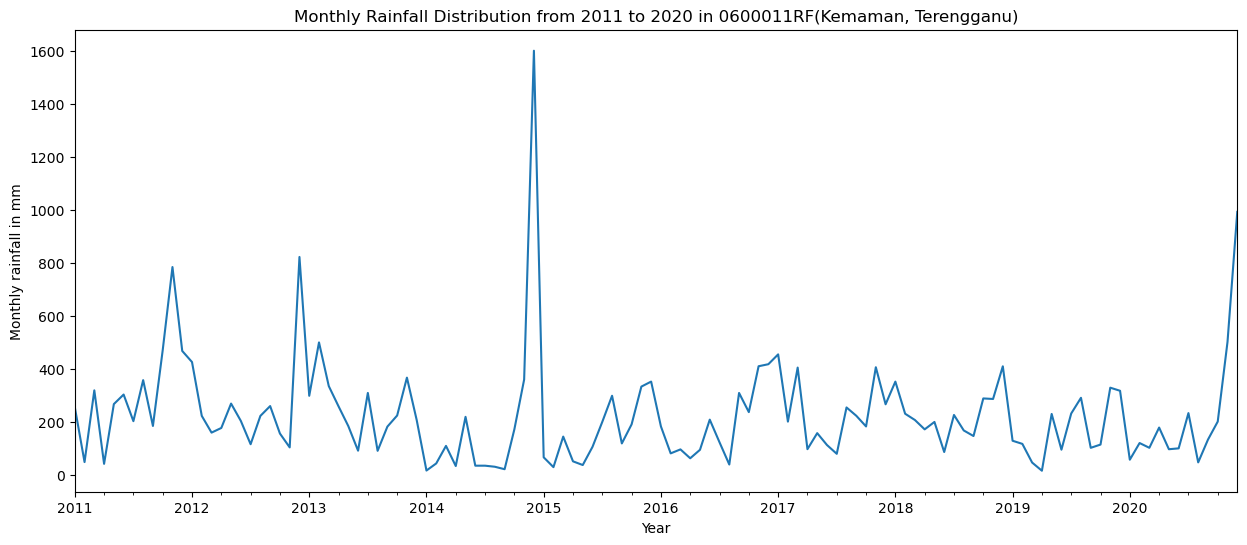

In [7]:
# rainfall by month
monthly_rain = df_kemaman['Precipitation'].resample('MS').sum()

# plot graph
monthly_rain.plot(figsize=(15, 6))
plt.xlabel('Year')
plt.ylabel('Monthly rainfall in mm')
plt.title('Monthly Rainfall Distribution from 2011 to 2020 in 0600011RF(Kemaman, Terengganu)', fontsize = 12)
plt.show()

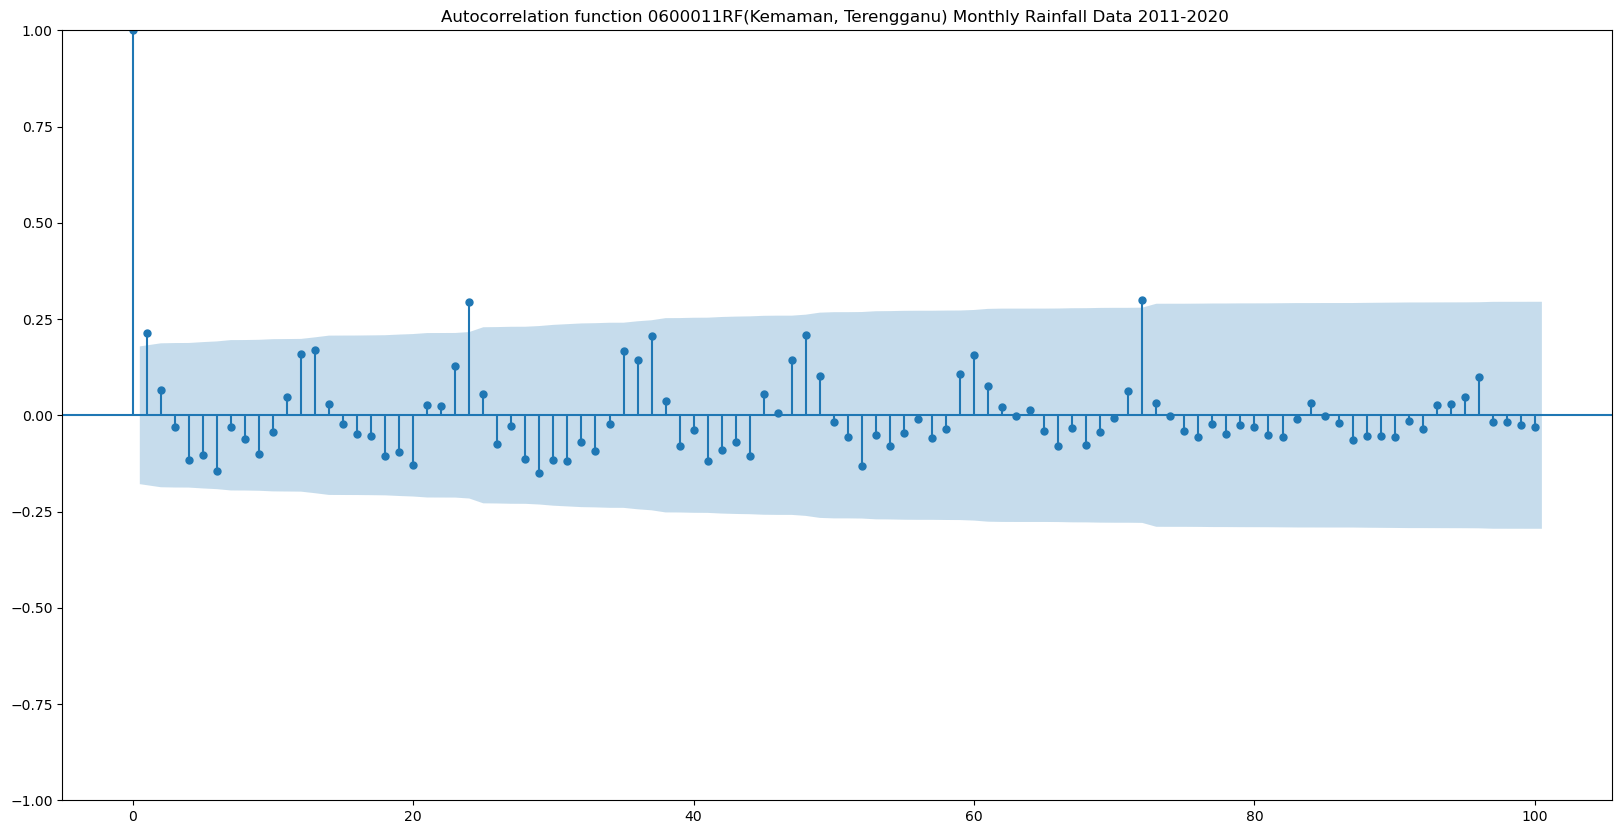

In [8]:
# statsmodels Time series Analysis plot: Autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

plt.rc("figure", figsize=(20,10))
plot_acf(df, lags = 100,
plt.show()